# Practical Project 

This notebook presents an analysis based on the metadata from the benchmarking study by McElfresh et al.: "When do neural networks outperform boosted trees on tabular data?" (2023).
- Their [paper](https://proceedings.neurips.cc/paper_files/paper/2023/hash/f06d5ebd4ff40b40dd97e30cee632123-Abstract-Datasets_and_Benchmarks.html) can be found here.
- The [repository](https://github.com/naszilla/tabzilla) for the study is available here.

The results of this analysis are presented in a paper titled "Comparing Machine Learning and Deep Learning Algorithms on Tabular Data" as part of the seminar "Advances in Tabular Machine Learning" during the Winter Semester 2024/2025 at the Institute of Statistics, LMU Munich. \
\
Author of this notebook: Luis Mayer

### Getting Started

1. Download the TabZilla results dataset `metadataset_clean.csv` from the Google Drive folder [here](https://drive.google.com/drive/folders/1cHisTmruPHDCYVOYnaqvTdybLngMkB8R?usp=sharing).
2. To run this notebook, ensure you have a Python (3.11+) environment.


In [1]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openml

In [ ]:
# Load the dataset
file_path = "..." # Insert here the path to the CSV file 'metadatset_clean.csv'
metadataset_df = pd.read_csv(file_path)

## Data Exploration

In [3]:
# Get number of rows and columns
metadataset_df.shape

(985310, 21)

In [4]:
# Show first 10 rows
metadataset_df.head(10)

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,Accuracy__train,Accuracy__val,Accuracy__test,F1__train,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test
0,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,default,0.018501,0.026880,0.020194,0.990573,0.986760,...,0.994523,0.991053,0.993421,0.994523,0.991053,0.993421,4.039096,0.185535,0.028121,0.034166
1,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_1_s0,0.011968,0.024195,0.017324,0.995348,0.988589,...,0.997533,0.991974,0.994605,0.997533,0.991974,0.994605,3.624039,0.129900,0.020647,0.017871
2,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_10_s0,0.022589,0.029668,0.023737,0.990179,0.985547,...,0.992566,0.989605,0.990921,0.992566,0.989605,0.990921,2.494685,0.074099,0.021543,0.019580
3,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_11_s0,0.028515,0.034531,0.028539,0.987448,0.985578,...,0.990641,0.986974,0.990132,0.990641,0.986974,0.990132,2.532277,0.061874,0.014086,0.013869
4,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_12_s0,0.015119,0.025570,0.019329,0.993757,0.989098,...,0.996382,0.991447,0.993684,0.996382,0.991447,0.993684,4.220030,0.121606,0.034948,0.033927
5,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_13_s0,0.019731,0.027404,0.020895,0.990475,0.986764,...,0.994112,0.990658,0.992763,0.994112,0.990658,0.992763,2.675860,0.091875,0.033199,0.026333
6,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_14_s0,0.014921,0.025138,0.018928,0.994206,0.988828,...,0.996316,0.992105,0.994079,0.996316,0.992105,0.994079,4.132169,0.130839,0.036224,0.036254
7,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_15_s0,0.017312,0.027035,0.020222,0.992032,0.984953,...,0.994885,0.990395,0.993684,0.994885,0.990395,0.993684,2.632447,0.094472,0.023446,0.007779
8,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_16_s0,0.020220,0.027665,0.021582,0.990086,0.987148,...,0.993734,0.990132,0.992500,0.993734,0.990132,0.992500,3.239427,0.101228,0.016709,0.014506
9,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,binary,CatBoost,random_17_s0,0.019077,0.027175,0.020599,0.990603,0.986741,...,0.994276,0.990789,0.993026,0.994276,0.990789,0.993026,2.967541,0.079607,0.030742,0.023226


In [5]:
# Show last 10 rows
metadataset_df.tail(10)

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,Accuracy__train,Accuracy__val,Accuracy__test,F1__train,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test
985300,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_27_s0,1.125019,1.440373,1.363385,0.890686,0.852118,...,0.702756,0.598425,0.626984,0.700808,0.599530,0.628681,3.805991,0.058812,0.047478,0.047118
985301,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_28_s0,1.620572,1.946138,2.078617,0.892579,0.865945,...,0.711614,0.622047,0.666667,0.710304,0.620279,0.662416,4.520167,0.053120,0.047242,0.045872
985302,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_29_s0,2.091709,3.064494,2.618359,0.887106,0.813261,...,0.707677,0.574803,0.603175,0.707028,0.578247,0.603561,6.093665,0.054993,0.045236,0.045948
985303,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_3_s0,1.219003,1.592768,1.621258,0.892125,0.839582,...,0.710630,0.629921,0.626984,0.709728,0.631579,0.627043,3.695979,0.050092,0.044973,0.045400
985304,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_4_s0,1.924552,2.442937,2.419611,0.883037,0.846491,...,0.688976,0.582677,0.619048,0.686722,0.580980,0.613663,3.272215,0.048674,0.044129,0.043040
985305,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_5_s0,1.075331,1.460503,1.362272,0.895086,0.847196,...,0.716535,0.606299,0.626984,0.715092,0.609722,0.626736,6.675143,0.048872,0.043895,0.042311
985306,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_6_s0,1.891564,2.155562,2.337385,0.873311,0.846246,...,0.692913,0.590551,0.603175,0.692256,0.590747,0.602349,3.138584,0.048738,0.041508,0.049839
985307,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_7_s0,1.018551,1.379100,1.344363,0.896400,0.846951,...,0.713583,0.590551,0.611111,0.712877,0.592445,0.612003,9.424769,0.053142,0.048155,0.046927
985308,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_8_s0,2.329324,2.902949,2.762660,0.887312,0.854178,...,0.730315,0.637795,0.603175,0.730012,0.641874,0.604561,7.380742,0.052364,0.045521,0.043943
985309,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_9_s0,1.004896,1.330171,1.325328,0.894865,0.850567,...,0.703740,0.590551,0.619048,0.702840,0.593238,0.620122,9.830205,0.052547,0.048357,0.046934


In [6]:
# General information about the dataset (e.g. column names, data types, non-null counts)
metadataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985310 entries, 0 to 985309
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dataset_fold_id   985310 non-null  object 
 1   dataset_name      985310 non-null  object 
 2   target_type       985310 non-null  object 
 3   alg_name          985310 non-null  object 
 4   hparam_source     985310 non-null  object 
 5   Log Loss__train   985310 non-null  float64
 6   Log Loss__val     985310 non-null  float64
 7   Log Loss__test    985310 non-null  float64
 8   AUC__train        985310 non-null  float64
 9   AUC__val          982295 non-null  float64
 10  AUC__test         982295 non-null  float64
 11  Accuracy__train   985310 non-null  float64
 12  Accuracy__val     985310 non-null  float64
 13  Accuracy__test    985310 non-null  float64
 14  F1__train         985310 non-null  float64
 15  F1__val           985310 non-null  float64
 16  F1__test          98

In [7]:
# Statistical summary for numerical columns
metadataset_df.describe()

,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,AUC__test,Accuracy__train,Accuracy__val,Accuracy__test,F1__train,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test
count,985310.000000,985310.000000,985310.000000,985310.000000,982295.000000,982295.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000,985310.000000
mean,1.349626,1.495500,1.587622,0.858161,0.825961,0.819103,0.801669,0.767049,0.759976,0.789350,0.753218,0.746134,29.519312,1.624825,0.233359,0.232992
std,3.769621,3.699929,3.901140,0.171560,0.180614,0.185342,0.209380,0.210256,0.213108,0.230296,0.231152,0.233613,89.552242,24.348868,3.111267,3.113766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000299,0.000119,0.000091,0.000083
25%,0.141162,0.245491,0.259749,0.762266,0.714744,0.701959,0.702602,0.664207,0.654870,0.692476,0.648649,0.637681,0.237414,0.010281,0.002713,0.002498
50%,0.401042,0.509217,0.524807,0.934524,0.883333,0.877232,0.867188,0.818182,0.810345,0.864198,0.813292,0.807692,3.882856,0.051307,0.032142,0.031802
75%,0.711408,0.972700,1.013235,0.996439,0.983796,0.981585,0.972796,0.936759,0.932806,0.972263,0.936371,0.931119,18.173630,0.134651,0.055925,0.055599
max,34.538776,34.538776,34.538776,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6995.960404,1571.626035,215.797596,206.519667


In [8]:
# Count of missing values per column
metadataset_df.isnull().sum() 

dataset_fold_id        0
dataset_name           0
target_type            0
alg_name               0
hparam_source          0
Log Loss__train        0
Log Loss__val          0
Log Loss__test         0
AUC__train             0
AUC__val            3015
AUC__test           3015
Accuracy__train        0
Accuracy__val          0
Accuracy__test         0
F1__train              0
F1__val                0
F1__test               0
training_time          0
eval-time__train       0
eval-time__val         0
eval-time__test        0
dtype: int64

In [9]:
# Get unique values in column 'target_type'
metadataset_df['target_type'].unique()

array(['binary', 'classification'], dtype=object)

In [10]:
# Get unique values in column 'alg_name' 
# Three algorithms, DeepFM, TabTransformer and NAM are included here but not in the results of the paper
metadataset_df['alg_name'].unique()

array(['CatBoost', 'DecisionTree', 'DeepFM', 'KNN', 'LightGBM',
       'LinearModel', 'MLP', 'RandomForest', 'STG', 'SVM', 'TabNet',
       'TabTransformer', 'VIME', 'XGBoost', 'rtdl_MLP', 'rtdl_ResNet',
       'DANet', 'NAM', 'NODE', 'SAINT', 'rtdl_FTTransformer',
       'TabPFNModel'], dtype=object)

In [11]:
# Get unique values in column 'hparam_source'
metadataset_df['hparam_source'].unique()

array(['default', 'random_1_s0', 'random_10_s0', 'random_11_s0',
       'random_12_s0', 'random_13_s0', 'random_14_s0', 'random_15_s0',
       'random_16_s0', 'random_17_s0', 'random_18_s0', 'random_19_s0',
       'random_2_s0', 'random_20_s0', 'random_21_s0', 'random_22_s0',
       'random_23_s0', 'random_24_s0', 'random_25_s0', 'random_26_s0',
       'random_27_s0', 'random_28_s0', 'random_29_s0', 'random_3_s0',
       'random_4_s0', 'random_5_s0', 'random_6_s0', 'random_7_s0',
       'random_8_s0', 'random_9_s0'], dtype=object)

In [13]:
# Count datasets
unique_count = len(metadataset_df['dataset_name'].unique())
unique_count

176

## Analysis

### Filter on relevant algorithms and datasets

In [14]:
# Reduction to algorithms included in the results of the paper (exclude DeepFM, TabTransformer and NAM)
metadataset_df = metadataset_df[~metadataset_df['alg_name'].isin(['DeepFM', 'TabTransformer', 'NAM'])]

In [15]:
# Count the number of unique datasets each model was trained on
datasets_per_model = metadataset_df.groupby('alg_name')['dataset_name'].nunique().reset_index(name='dataset_count')

# Print the resulting DataFrame
datasets_per_model

,alg_name,dataset_count
0,CatBoost,165
1,DANet,147
2,DecisionTree,175
3,KNN,167
4,LightGBM,165
5,LinearModel,168
6,MLP,175
7,NODE,141
8,RandomForest,173
9,SAINT,138


In [16]:
# Count the number of unique models trained per dataset
model_per_dataset = metadataset_df.groupby('dataset_name')['alg_name'].nunique().reset_index(name='model_count')

# Print the resulting DataFrame
model_per_dataset

,dataset_name,model_count
0,openml__APSFailure__168868,14
1,openml__Amazon_employee_access__34539,17
2,openml__Australian__146818,19
3,openml__Bioresponse__9910,16
4,openml__CIFAR_10__167124,9
...,...,...
171,openml__walking-activity__9945,11
172,openml__wall-robot-navigation__9960,18
173,openml__wdbc__9946,19
174,openml__wilt__146820,18


In [17]:
# Filter datasets that have exactly 19 different models trained on them
datasets_with_19_models = model_per_dataset[model_per_dataset['model_count'] == 19]

# Print the number of such datasets
len(datasets_with_19_models)

57

In [18]:
# Merge the filtered dataset list with the main dataframe to keep only datasets with exactly 19 models trained on them
metadataset_df = metadataset_df.merge(datasets_with_19_models[['dataset_name']], on='dataset_name', how='inner')

### Add new columns

In [19]:
# Extract the actual dataset name by splitting the 'dataset_name' column at '__' and taking the second part
metadataset_df['Dataset'] = metadataset_df['dataset_name'].str.split('__').str[1]

In [20]:
# Extract the fold number from the 'dataset_fold_id' column using regex
metadataset_df['fold'] = metadataset_df['dataset_fold_id'].str.extract(r'fold_(\d+)')

# Convert 'fold' column to integer type for numerical operations
metadataset_df['fold'] = metadataset_df['fold'].astype(int)

In [21]:
# Print the DataFrame
metadataset_df

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,Accuracy__test,F1__train,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold
0,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,default,0.249735,0.343735,0.277545,0.967892,0.921902,...,0.869565,0.903986,0.855072,0.869565,2.204476,0.016778,0.003949,0.001760,Australian,0
1,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_1_s0,0.195597,0.342581,0.274890,0.985854,0.912564,...,0.884058,0.936594,0.855072,0.884058,1.338841,0.013759,0.004040,0.001680,Australian,0
2,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_10_s0,0.256830,0.324591,0.303388,0.962906,0.922750,...,0.884058,0.889493,0.840580,0.884058,0.852739,0.013988,0.001880,0.001155,Australian,0
3,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_11_s0,0.305004,0.349768,0.310922,0.955973,0.921902,...,0.869565,0.869565,0.898551,0.869565,0.828760,0.013758,0.001576,0.001081,Australian,0
4,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_12_s0,0.242508,0.362340,0.292893,0.980110,0.918506,...,0.913043,0.929348,0.855072,0.913043,1.651190,0.013995,0.003266,0.001478,Australian,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373565,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_5_s0,1.075331,1.460503,1.362272,0.895086,0.847196,...,0.626984,0.715092,0.609722,0.626736,6.675143,0.048872,0.043895,0.042311,yeast,9
373566,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_6_s0,1.891564,2.155562,2.337385,0.873311,0.846246,...,0.603175,0.692256,0.590747,0.602349,3.138584,0.048738,0.041508,0.049839,yeast,9
373567,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_7_s0,1.018551,1.379100,1.344363,0.896400,0.846951,...,0.611111,0.712877,0.592445,0.612003,9.424769,0.053142,0.048155,0.046927,yeast,9
373568,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_8_s0,2.329324,2.902949,2.762660,0.887312,0.854178,...,0.603175,0.730012,0.641874,0.604561,7.380742,0.052364,0.045521,0.043943,yeast,9


### Add information regarding the datatype of each feature for all datasets

In [22]:
# Function to retrieve dataset ID based on its name from OpenML
def get_dataset_id_by_name(name):
    datasets = openml.datasets.list_datasets(output_format='dataframe')  # Fetch all datasets as a DataFrame
    dataset_id = int(datasets[datasets['name'] == name].iloc[0]['did'])  # Extract dataset ID based on the name
    return dataset_id

In [23]:
# List of dataset names to be analyzed
# Names of the 57 datasets that have exactly 19 different models trained on them
dataset_names = [
    'Australian', 'LED-display-domain-7digit', 'MiceProtein', 'acute-inflammations', 
    'analcatdata_authorship', 'analcatdata_boxing1', 'analcatdata_chlamydia', 
    'analcatdata_dmft', 'anneal', 'autos', 'balance-scale', 'blood-transfusion-service-center', 
    'blood-transfusion-service-center', 'breast-cancer', 'breast-w', 'colic', 'colic', 
    'credit-approval', 'cylinder-bands', 'dermatology', 'diabetes', 'dresses-sales', 'ecoli', 
    'eucalyptus', 'fertility', 'fri_c0_100_5', 'fri_c3_100_5', 'glass', 'hayes-roth', 'heart-c', 
    'heart-h', 'hill-valley', 'ilpd', 'ionosphere', 'iris', 'irish', 'kc2', 'labor', 'lung-cancer', 
    'lymph', 'monks-problems-2', 'pc1', 'postoperative-patient-data', 'profb', 'qsar-biodeg', 
    'rabe_266', 'socmob', 'sonar', 'synthetic_control', 'tae', 'tic-tac-toe', 'transplant', 'vehicle', 
    'visualizing_environmental', 'visualizing_livestock', 'wdbc', 'yeast'
]

# Initialize an empty list to store results
dataset_type_results = []

# Loop through each dataset name to analyze its feature types
for dataset_name in dataset_names:
    try:
        # Retrieve dataset ID from OpenML
        dataset_id = get_dataset_id_by_name(dataset_name)

        # Fetch the dataset from OpenML
        dataset = openml.datasets.get_dataset(dataset_id)
        df, *_ = dataset.get_data()  # Load dataset into a Pandas DataFrame

        # Get the target column (if available)
        target_column = dataset.default_target_attribute

        # Remove the target column to analyze only the feature columns
        df_features = df.drop(columns=[target_column])

        # Initialize flags for feature types
        has_numeric = False  # Flag for numerical features
        has_not_numeric = False    # Flag for categorical/non-numerical features
        
        # Loop through columns to check if they are numeric or not_numeric
        for col in df_features.columns:
            if pd.api.types.is_numeric_dtype(df_features[col]):  # Check if column is numeric
                has_numeric = True
            else:  # Non-numeric columns are considered not_numeric
                has_not_numeric = True

            # If both feature types are found, break early
            if has_numeric and has_not_numeric:
                break

        # Store results for the dataset
        dataset_type_results.append([dataset_name, has_numeric, has_not_numeric])

    except Exception as e:
        # Print an error message if fetching the dataset fails
        print(f"Error retrieving {dataset_name}: {e}")

# Create a DataFrame with the results
dataset_type_df = pd.DataFrame(dataset_type_results, columns=['Dataset', 'Has numeric', 'Has not_numeric'])

# Display the resulting DataFrame
dataset_type_df

,Dataset,Has numeric,Has not_numeric
0,Australian,True,True
1,LED-display-domain-7digit,True,False
2,MiceProtein,True,False
3,acute-inflammations,True,True
4,analcatdata_authorship,True,False
5,analcatdata_boxing1,False,True
6,analcatdata_chlamydia,False,True
7,analcatdata_dmft,False,True
8,anneal,True,True
9,autos,True,True


In [24]:
# Count the number of datasets that have only numeric features
count_numeric_only= len(dataset_type_df[(dataset_type_df['Has numeric'] == True) & (dataset_type_df['Has not_numeric'] == False)])

# Count the number of datasets that have only not_numeric features
count_not_numeric_only = len(dataset_type_df[(dataset_type_df['Has numeric'] == False) & (dataset_type_df['Has not_numeric'] == True)])

# Count the number of datasets that have both numeric and not_numeric features
count_both = len(dataset_type_df[(dataset_type_df['Has numeric'] == True) & (dataset_type_df['Has not_numeric'] == True)])

# Print the results
print(f"Number of datasets with only numeric features: {count_numeric_only}")
print(f"Number of datasets with only not_numeric features: {count_not_numeric_only}")
print(f"Number of datasets with both numeric and not_numeric features: {count_both}")


Number of datasets with only numeric features: 28
Number of datasets with only not_numeric features: 8
Number of datasets with both numeric and not_numeric features: 21


In [25]:
# Merging the 'metadataset_df' DataFrame with the 'dataset_type_df' DataFrame on the 'Dataset' column
# This ensures that only rows with matching dataset names in both DataFrames are retained.
metadataset_df = metadataset_df.merge(dataset_type_df, on='Dataset', how='inner')

In [26]:
# Print the DataFrame
metadataset_df

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
0,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,default,0.249735,0.343735,0.277545,0.967892,0.921902,...,0.855072,0.869565,2.204476,0.016778,0.003949,0.001760,Australian,0,True,True
1,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_1_s0,0.195597,0.342581,0.274890,0.985854,0.912564,...,0.855072,0.884058,1.338841,0.013759,0.004040,0.001680,Australian,0,True,True
2,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_10_s0,0.256830,0.324591,0.303388,0.962906,0.922750,...,0.840580,0.884058,0.852739,0.013988,0.001880,0.001155,Australian,0,True,True
3,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_11_s0,0.305004,0.349768,0.310922,0.955973,0.921902,...,0.898551,0.869565,0.828760,0.013758,0.001576,0.001081,Australian,0,True,True
4,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,random_12_s0,0.242508,0.362340,0.292893,0.980110,0.918506,...,0.855072,0.913043,1.651190,0.013995,0.003266,0.001478,Australian,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399465,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_5_s0,1.075331,1.460503,1.362272,0.895086,0.847196,...,0.609722,0.626736,6.675143,0.048872,0.043895,0.042311,yeast,9,True,False
399466,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_6_s0,1.891564,2.155562,2.337385,0.873311,0.846246,...,0.590747,0.602349,3.138584,0.048738,0.041508,0.049839,yeast,9,True,False
399467,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_7_s0,1.018551,1.379100,1.344363,0.896400,0.846951,...,0.592445,0.612003,9.424769,0.053142,0.048155,0.046927,yeast,9,True,False
399468,openml__yeast__145793__fold_9,openml__yeast__145793,classification,rtdl_ResNet,random_8_s0,2.329324,2.902949,2.762660,0.887312,0.854178,...,0.641874,0.604561,7.380742,0.052364,0.045521,0.043943,yeast,9,True,False


In [27]:
# Number of NaN values in column 'Accuracy__val'
metadataset_df['Accuracy__val'].isna().sum()

0

### Average perfomance of all algorithms on each dataset group based on default hyperparameters in fold 0

In [28]:
# Filter the dataset to include only rows where:
# - The 'hparam_source' column is set to 'default' 
# - The 'fold' column is equal to 0 
df_default = metadataset_df[(metadataset_df['hparam_source'] == 'default') & (metadataset_df['fold'].astype(int) == 0)]

In [29]:
# Print the DataFrame
df_default

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
0,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,default,0.249735,0.343735,0.277545,0.967892,0.921902,...,0.855072,0.869565,2.204476,0.016778,0.003949,0.001760,Australian,0,True,True
30,openml__Australian__146818__fold_0,openml__Australian__146818,binary,DANet,default,0.225042,0.442467,0.281161,0.969022,0.899830,...,0.855072,0.927536,35.164284,0.039102,0.030600,0.030271,Australian,0,True,True
60,openml__Australian__146818__fold_0,openml__Australian__146818,binary,DecisionTree,default,0.208202,1.841754,2.257726,0.971429,0.869694,...,0.826087,0.869565,0.009380,0.000918,0.000337,0.000266,Australian,0,True,True
90,openml__Australian__146818__fold_0,openml__Australian__146818,binary,KNN,default,0.450591,0.611149,0.989899,0.854962,0.729202,...,0.623188,0.724638,0.002895,0.018087,0.011473,0.011011,Australian,0,True,True
120,openml__Australian__146818__fold_0,openml__Australian__146818,binary,LightGBM,default,0.350334,0.406983,0.360054,0.966855,0.939304,...,0.840580,0.913043,0.151479,0.001857,0.000801,0.000663,Australian,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393018,openml__yeast__145793__fold_0,openml__yeast__145793,classification,XGBoost,default,0.439270,0.948430,0.844138,0.982525,0.853133,...,0.549289,0.612591,1.387773,0.006125,0.005054,0.001050,yeast,0,True,False
393019,openml__yeast__145793__fold_0,openml__yeast__145793,classification,XGBoost,default,0.439270,0.948430,0.844138,0.982525,0.853133,...,0.549289,0.612591,1.595270,0.009597,0.001165,0.001100,yeast,0,True,False
393107,openml__yeast__145793__fold_0,openml__yeast__145793,classification,rtdl_FTTransformer,default,1.659509,1.835305,2.161811,0.849369,0.813572,...,0.584747,0.528928,6.212002,0.066690,0.044995,0.045295,yeast,0,True,False
393137,openml__yeast__145793__fold_0,openml__yeast__145793,classification,rtdl_MLP,default,1.633673,1.496316,2.242831,0.867580,0.853923,...,0.542766,0.542896,2.975254,0.042971,0.040548,0.038719,yeast,0,True,False


In [30]:
# For each combination of 'alg_name'  and 'dataset_name',
# select the row with the highest validation accuracy ('Accuracy__val').
df_default = df_default.loc[
    df_default.groupby(['alg_name', 'dataset_name'])['Accuracy__val'].idxmax()
]

In [31]:
# Print the DataFrame
df_default

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
0,openml__Australian__146818__fold_0,openml__Australian__146818,binary,CatBoost,default,0.249735,0.343735,0.277545,0.967892,0.921902,...,0.855072,0.869565,2.204476,0.016778,0.003949,0.001760,Australian,0,True,True
5860,openml__LED-display-domain-7digit__125921__fold_0,openml__LED-display-domain-7digit__125921,classification,CatBoost,default,0.604687,0.690993,0.889560,0.975586,0.978630,...,0.799145,0.689520,0.646054,0.001829,0.000753,0.000738,LED-display-domain-7digit,0,True,False
12800,openml__MiceProtein__146800__fold_0,openml__MiceProtein__146800,classification,CatBoost,default,0.286740,0.388318,0.458210,0.999926,0.998307,...,0.953389,0.945552,2.511357,0.058087,0.011646,0.005592,MiceProtein,0,True,False
18090,openml__acute-inflammations__10089__fold_0,openml__acute-inflammations__10089,binary,CatBoost,default,0.000976,0.001008,0.001118,1.000000,1.000000,...,1.000000,1.000000,0.190216,0.000860,0.000552,0.000541,acute-inflammations,0,True,True
25650,openml__analcatdata_authorship__3549__fold_0,openml__analcatdata_authorship__3549,classification,CatBoost,default,0.063786,0.067832,0.134252,0.999992,1.000000,...,1.000000,0.976323,2.553133,0.010090,0.002403,0.002768,analcatdata_authorship,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367888,openml__vehicle__53__fold_0,openml__vehicle__53,classification,rtdl_ResNet,default,0.325867,0.542672,0.456399,0.973846,0.943829,...,0.795254,0.836709,7.465135,0.046824,0.043417,0.042683,vehicle,0,True,False
373360,openml__visualizing_environmental__3602__fold_0,openml__visualizing_environmental__3602,binary,rtdl_ResNet,default,0.557685,0.643381,0.686521,0.805397,0.533333,...,0.636364,0.666667,2.508434,0.040879,0.040652,0.041499,visualizing_environmental,0,True,False
380560,openml__visualizing_livestock__3731__fold_0,openml__visualizing_livestock__3731,binary,rtdl_ResNet,default,0.087805,0.390093,0.717748,1.000000,0.863636,...,0.692308,0.615385,3.983518,0.045694,0.047391,0.044724,visualizing_livestock,0,True,True
387583,openml__wdbc__9946__fold_0,openml__wdbc__9946,binary,rtdl_ResNet,default,0.075380,0.055942,0.056273,0.996739,1.000000,...,0.982456,0.964912,8.299895,0.049242,0.047279,0.046605,wdbc,0,True,False


In [32]:
# Filter the dataset to include only rows where:
# - The dataset contains both numeric and non-numeric features
df_default_numeric_and_not_numeric = df_default[(df_default['Has numeric'] == True) & (df_default['Has not_numeric'] == True)]

# Filter the dataset to include only rows where:
# - The dataset contains only numeric features 
df_default_only_numeric = df_default[(df_default['Has numeric'] == True) & (df_default['Has not_numeric'] == False)]

# Filter the dataset to include only rows where:
# - The dataset contains only non-numeric features
df_default_only_not_numeric = df_default[(df_default['Has numeric'] == False) & (df_default['Has not_numeric'] == True)]

In [33]:
# Group the dataset by algorithm name ('alg_name') and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_default_all = df_default.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy across all datasets for each algorithm
}).reset_index()

In [34]:
# Group the dataset containing both numeric and non-numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_default_numeric_and_not_numeric_summary = df_default_numeric_and_not_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy across all relevant datasets for each algorithm
}).reset_index()

In [35]:
# Group the dataset containing only numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_default_only_numeric_summary = df_default_only_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy across all relevant datasets for each algorithm
}).reset_index()

In [36]:
# Group the dataset containing only non-numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_default_only_not_numeric_summary = df_default_only_not_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy across all relevant datasets for each algorithm
}).reset_index()

#### Visualize Results

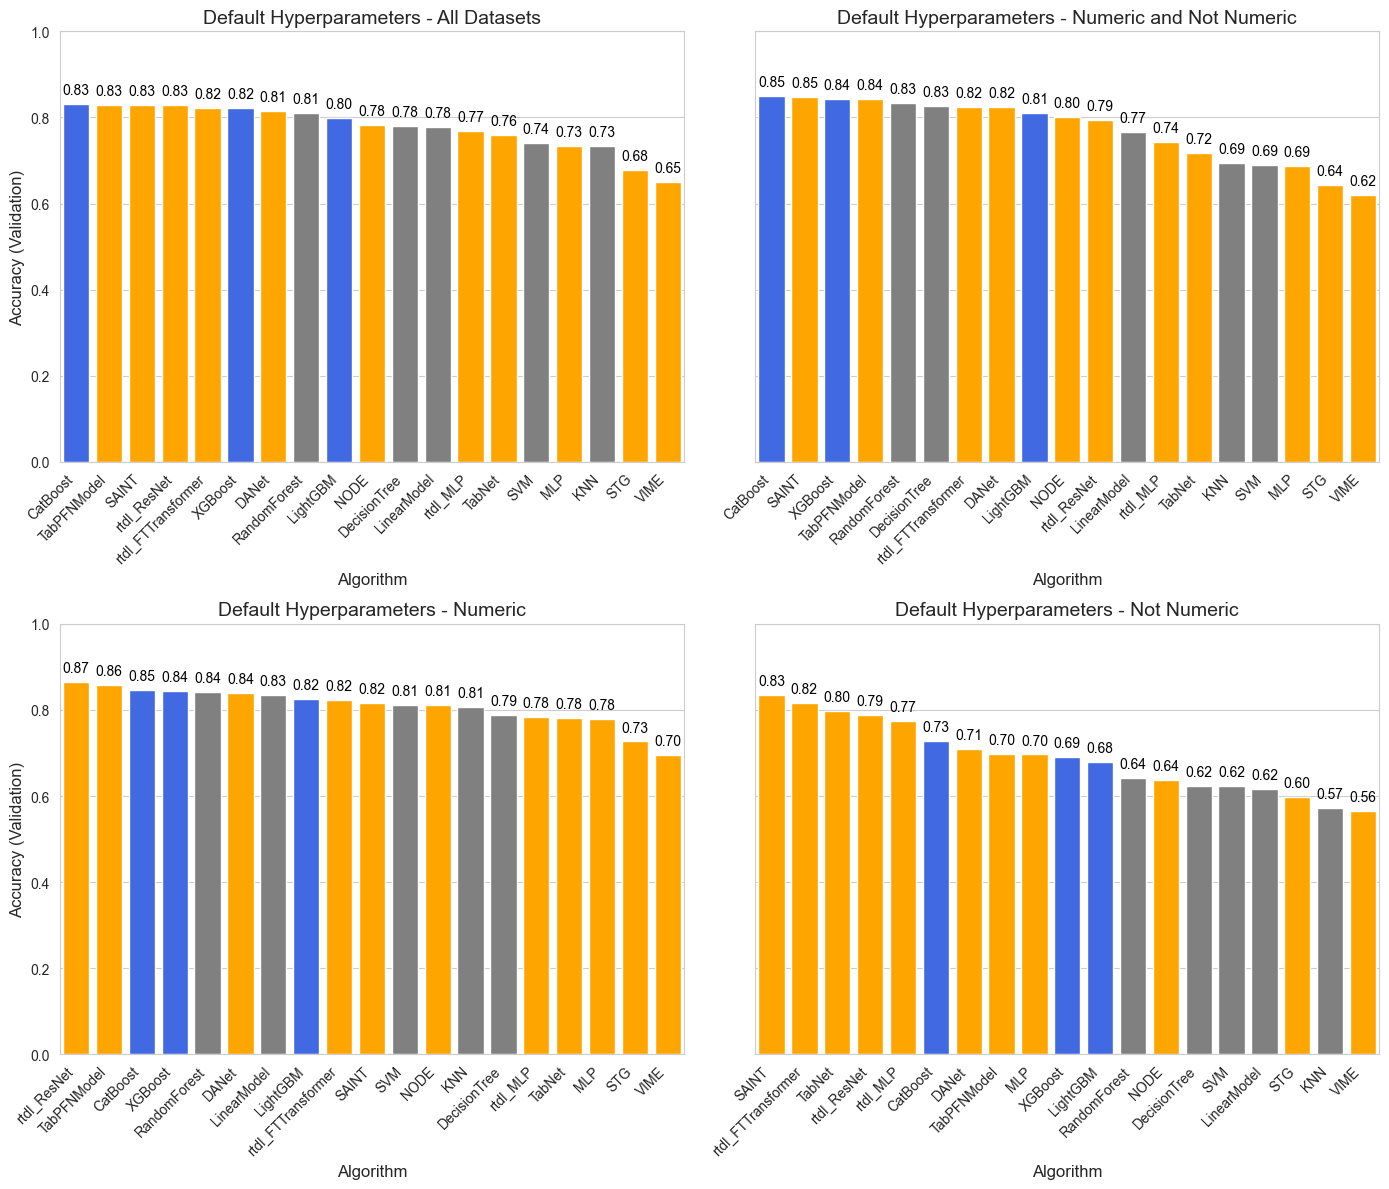

In [37]:
# Set the plot style
sns.set_style("whitegrid")

# Create a figure with four subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define the datasets and titles for each subplot
datasets = [
    (df_default_all, "Default Hyperparameters - All Datasets"),
    (df_default_numeric_and_not_numeric_summary, "Default Hyperparameters - Numeric and Not Numeric"),
    (df_default_only_numeric_summary, "Default Hyperparameters - Numeric"),
    (df_default_only_not_numeric_summary, "Default Hyperparameters - Not Numeric")
]

# Define algorithm color categories
blue_algorithms = {"CatBoost", "LightGBM", "XGBoost"}
gray_algorithms = {"SVM", "DecisionTree", "LinearModel", "KNN", "RandomForest"}

# Loop through each dataset and create a bar plot
for ax, (df, title) in zip(axes, datasets):
    # Sort data by Accuracy for better visualization
    df = df.sort_values(by='Accuracy__val', ascending=False)

    # Assign colors based on algorithm name
    colors = [
        "royalblue" if alg in blue_algorithms else 
        "gray" if alg in gray_algorithms else 
        "orange" 
        for alg in df["alg_name"]
    ]

    # Create bar plot
    sns.barplot(data=df, x='alg_name', y='Accuracy__val', ax=ax, hue='alg_name', dodge=False, legend=False)  

    # Manually set bar colors
    for bar, color in zip(ax.patches, colors):
        bar.set_facecolor(color)

    # Set labels and title
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Accuracy (Validation)', fontsize=12)
    ax.set_title(title, fontsize=14)

    # Ensure correct tick placement before setting labels
    ax.set_xticks(range(len(df["alg_name"])))
    ax.set_xticklabels(df["alg_name"], rotation=45, ha="right")

    # Display accuracy values above the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set y-axis range (0 to 1)
axes[0].set_ylim(0, 1)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Average performance of each algorithm based on the best accuracy observed on the validation set across all datasets

In [38]:
# For each combination of 'alg_name' (algorithm name) and 'dataset_name' (dataset name),
# select the row with the highest validation accuracy ('Accuracy__val').
best_performance_df = metadataset_df.loc[
    metadataset_df.groupby(['alg_name', 'dataset_name'])['Accuracy__val'].idxmax()
]

In [39]:
# Display the filtered DataFrame containing the best-performing entries for each algorithm-dataset pair.
best_performance_df

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
1762,openml__Australian__146818__fold_3,openml__Australian__146818,binary,CatBoost,random_12_s0,0.237566,0.280313,0.345327,0.977518,0.953311,...,0.927536,0.869565,1.615032,0.009933,0.001929,0.004257,Australian,3,True,True
7955,openml__LED-display-domain-7digit__125921__fold_3,openml__LED-display-domain-7digit__125921,classification,CatBoost,random_12_s0,0.688984,0.737444,0.995410,0.973294,0.950269,...,0.856310,0.678742,2.521813,0.012420,0.005693,0.002077,LED-display-domain-7digit,3,True,False
12828,openml__MiceProtein__146800__fold_0,openml__MiceProtein__146800,classification,CatBoost,random_8_s0,0.344865,0.644250,0.650037,1.000000,1.000000,...,1.000000,0.972234,15.282614,0.020253,0.011603,0.006883,MiceProtein,0,True,False
18090,openml__acute-inflammations__10089__fold_0,openml__acute-inflammations__10089,binary,CatBoost,default,0.000976,0.001008,0.001118,1.000000,1.000000,...,1.000000,1.000000,0.190216,0.000860,0.000552,0.000541,acute-inflammations,0,True,True
25650,openml__analcatdata_authorship__3549__fold_0,openml__analcatdata_authorship__3549,classification,CatBoost,default,0.063786,0.067832,0.134252,0.999992,1.000000,...,1.000000,0.976323,2.553133,0.010090,0.002403,0.002768,analcatdata_authorship,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370009,openml__vehicle__53__fold_4,openml__vehicle__53,classification,rtdl_ResNet,random_17_s0,0.515919,0.393644,0.709655,0.947550,0.962565,...,0.891665,0.714108,8.002126,0.045371,0.044386,0.042375,vehicle,4,True,False
374081,openml__visualizing_environmental__3602__fold_1,openml__visualizing_environmental__3602,binary,rtdl_ResNet,random_1_s0,0.563972,0.357756,0.648620,0.774390,1.000000,...,1.000000,0.636364,5.187148,0.041491,0.040812,0.041936,visualizing_environmental,1,True,False
382000,openml__visualizing_livestock__3731__fold_2,openml__visualizing_livestock__3731,binary,rtdl_ResNet,default,0.027206,0.076195,1.711298,1.000000,1.000000,...,1.000000,0.538462,5.561668,0.048117,0.048114,0.049876,visualizing_livestock,2,True,True
388671,openml__wdbc__9946__fold_2,openml__wdbc__9946,binary,rtdl_ResNet,random_10_s0,0.080568,0.036367,0.252768,0.997977,1.000000,...,1.000000,0.929825,6.737642,0.052400,0.048875,0.045978,wdbc,2,True,False


In [40]:
# Filter the dataset to include only rows where:
# - The dataset contains both numeric and non-numeric features
df_best_numeric_and_not_numeric = best_performance_df[
    (best_performance_df['Has numeric'] == True) & (best_performance_df['Has not_numeric'] == True)
]

# Filter the dataset to include only rows where:
# - The dataset contains only numeric features 
df_best_only_numeric = best_performance_df[
    (best_performance_df['Has numeric'] == True) & (best_performance_df['Has not_numeric'] == False)
]

# Filter the dataset to include only rows where:
# - The dataset contains only non-numeric features
df_best_only_not_numeric = best_performance_df[
    (best_performance_df['Has numeric'] == False) & (best_performance_df['Has not_numeric'] == True)
]

In [41]:
# Group the dataset by algorithm name ('alg_name') and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
best_performance_df_summary = best_performance_df.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy for each algorithm
}).reset_index()

In [42]:
# Group the dataset containing both numeric and non-numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_best_numeric_and_not_numeric_summary = df_best_numeric_and_not_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy for each algorithm
}).reset_index()

In [43]:
# Group the dataset containing only numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_best_only_numeric_summary = df_best_only_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy for each algorithm
}).reset_index()

In [44]:
# Group the dataset containing only non-numeric features by algorithm name ('alg_name') 
# and compute the mean validation accuracy ('Accuracy__val') for each algorithm.
df_best_only_not_numeric_summary = df_best_only_not_numeric.groupby('alg_name').agg({
    'Accuracy__val': 'mean'  # Calculate the mean accuracy for each algorithm
}).reset_index()

#### Visualize Results

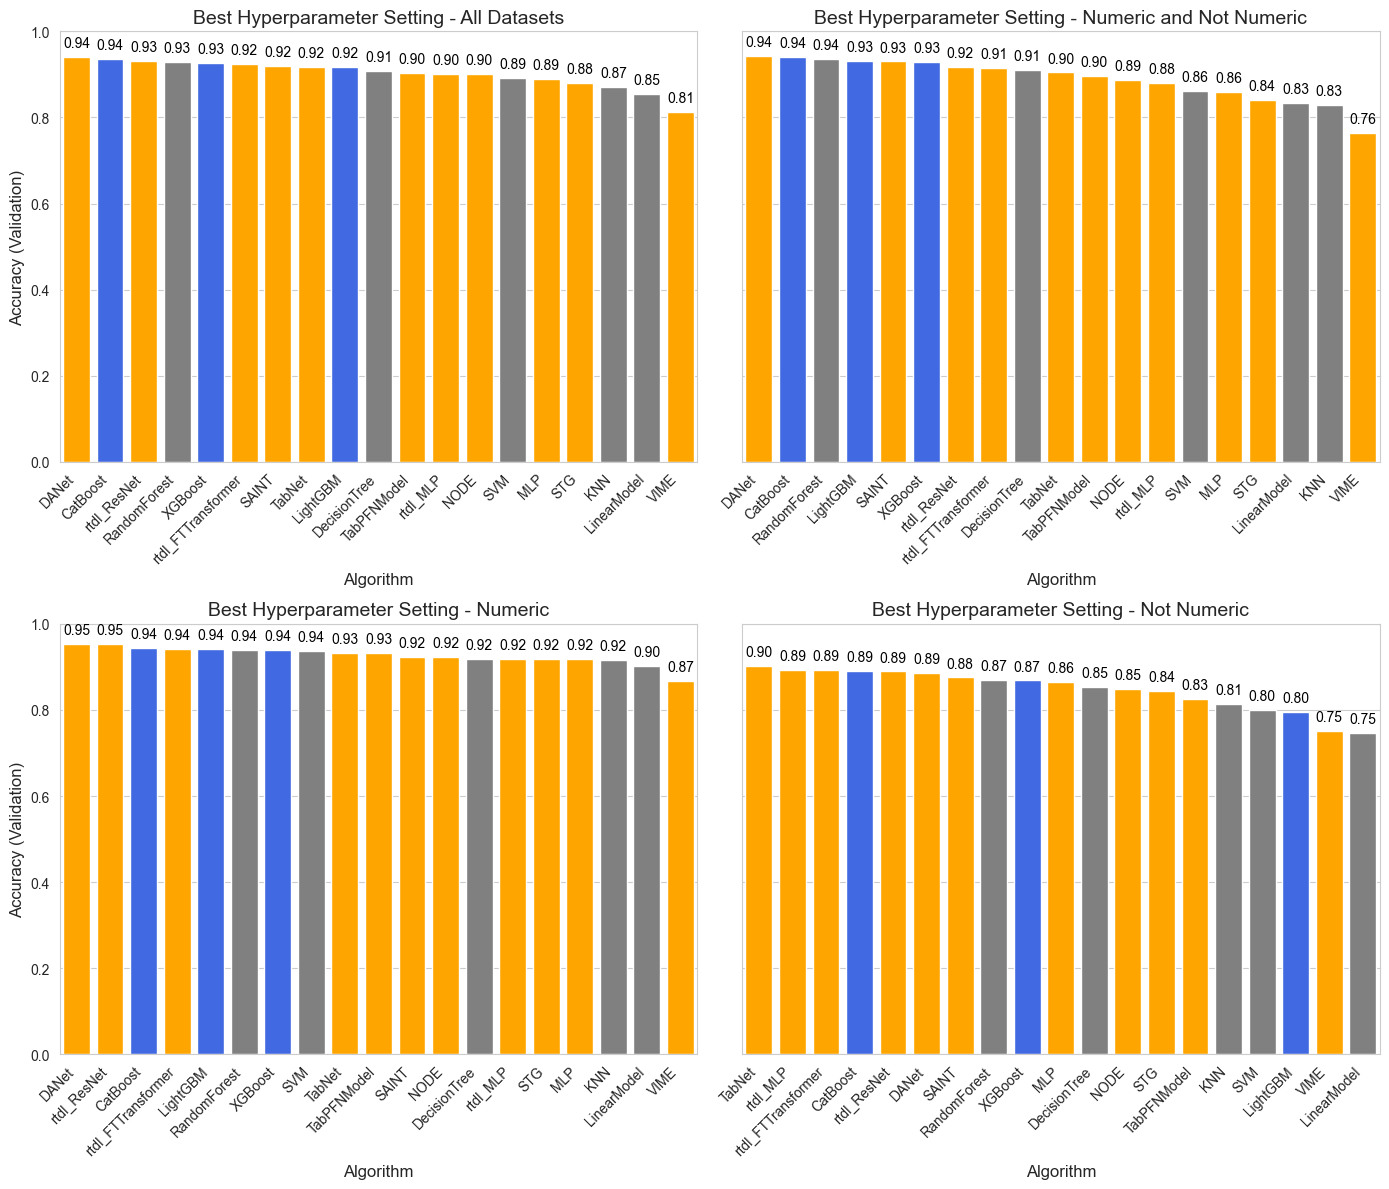

In [45]:
# Set the plot style
sns.set_style("whitegrid")

# Create a figure with four subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define the datasets and titles for each subplot
datasets = [
    (best_performance_df_summary, "Best Hyperparameter Setting - All Datasets"),
    (df_best_numeric_and_not_numeric_summary, "Best Hyperparameter Setting - Numeric and Not Numeric"),
    (df_best_only_numeric_summary, "Best Hyperparameter Setting - Numeric"),
    (df_best_only_not_numeric_summary, "Best Hyperparameter Setting - Not Numeric")
]

# Define algorithm color categories
blue_algorithms = {"CatBoost", "LightGBM", "XGBoost"}
gray_algorithms = {"SVM", "DecisionTree", "LinearModel", "KNN", "RandomForest"}

# Loop through each dataset and create a bar plot
for ax, (df, title) in zip(axes, datasets):
    # Sort data by Accuracy for better visualization
    df = df.sort_values(by='Accuracy__val', ascending=False)

    # Assign colors based on algorithm name
    colors = [
        "royalblue" if alg in blue_algorithms else 
        "gray" if alg in gray_algorithms else 
        "orange" 
        for alg in df["alg_name"]
    ]

    # Create bar plot with correct hue setting to avoid warnings
    sns.barplot(data=df, x='alg_name', y='Accuracy__val', ax=ax, hue='alg_name', dodge=False, legend=False)  

    # Manually set bar colors
    for bar, color in zip(ax.patches, colors):
        bar.set_facecolor(color)

    # Set labels and title
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Accuracy (Validation)', fontsize=12)
    ax.set_title(title, fontsize=14)

    # Ensure correct tick placement before setting labels
    ax.set_xticks(range(len(df["alg_name"])))
    ax.set_xticklabels(df["alg_name"], rotation=45, ha="right")

    # Display accuracy values above the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set y-axis range (0 to 1)
axes[0].set_ylim(0, 1)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Cases where the best performance is achieved with default hyperparameters in fold 0

In [46]:
# Display the filtered DataFrame containing the best-performing entries for each algorithm-dataset pair.
best_performance_df

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
1762,openml__Australian__146818__fold_3,openml__Australian__146818,binary,CatBoost,random_12_s0,0.237566,0.280313,0.345327,0.977518,0.953311,...,0.927536,0.869565,1.615032,0.009933,0.001929,0.004257,Australian,3,True,True
7955,openml__LED-display-domain-7digit__125921__fold_3,openml__LED-display-domain-7digit__125921,classification,CatBoost,random_12_s0,0.688984,0.737444,0.995410,0.973294,0.950269,...,0.856310,0.678742,2.521813,0.012420,0.005693,0.002077,LED-display-domain-7digit,3,True,False
12828,openml__MiceProtein__146800__fold_0,openml__MiceProtein__146800,classification,CatBoost,random_8_s0,0.344865,0.644250,0.650037,1.000000,1.000000,...,1.000000,0.972234,15.282614,0.020253,0.011603,0.006883,MiceProtein,0,True,False
18090,openml__acute-inflammations__10089__fold_0,openml__acute-inflammations__10089,binary,CatBoost,default,0.000976,0.001008,0.001118,1.000000,1.000000,...,1.000000,1.000000,0.190216,0.000860,0.000552,0.000541,acute-inflammations,0,True,True
25650,openml__analcatdata_authorship__3549__fold_0,openml__analcatdata_authorship__3549,classification,CatBoost,default,0.063786,0.067832,0.134252,0.999992,1.000000,...,1.000000,0.976323,2.553133,0.010090,0.002403,0.002768,analcatdata_authorship,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370009,openml__vehicle__53__fold_4,openml__vehicle__53,classification,rtdl_ResNet,random_17_s0,0.515919,0.393644,0.709655,0.947550,0.962565,...,0.891665,0.714108,8.002126,0.045371,0.044386,0.042375,vehicle,4,True,False
374081,openml__visualizing_environmental__3602__fold_1,openml__visualizing_environmental__3602,binary,rtdl_ResNet,random_1_s0,0.563972,0.357756,0.648620,0.774390,1.000000,...,1.000000,0.636364,5.187148,0.041491,0.040812,0.041936,visualizing_environmental,1,True,False
382000,openml__visualizing_livestock__3731__fold_2,openml__visualizing_livestock__3731,binary,rtdl_ResNet,default,0.027206,0.076195,1.711298,1.000000,1.000000,...,1.000000,0.538462,5.561668,0.048117,0.048114,0.049876,visualizing_livestock,2,True,True
388671,openml__wdbc__9946__fold_2,openml__wdbc__9946,binary,rtdl_ResNet,random_10_s0,0.080568,0.036367,0.252768,0.997977,1.000000,...,1.000000,0.929825,6.737642,0.052400,0.048875,0.045978,wdbc,2,True,False


In [47]:
# Filter rows where 'hparam_source' is "default" and "fold" is 0
df_default_fold_0 = best_performance_df[(best_performance_df["hparam_source"] == "default") & (best_performance_df["fold"] == 0)]

# Display the filtered rows
df_default_fold_0

,dataset_fold_id,dataset_name,target_type,alg_name,hparam_source,Log Loss__train,Log Loss__val,Log Loss__test,AUC__train,AUC__val,...,F1__val,F1__test,training_time,eval-time__train,eval-time__val,eval-time__test,Dataset,fold,Has numeric,Has not_numeric
18090,openml__acute-inflammations__10089__fold_0,openml__acute-inflammations__10089,binary,CatBoost,default,0.000976,0.001008,0.001118,1.000000,1.000000,...,1.000000,1.000000,0.190216,0.000860,0.000552,0.000541,acute-inflammations,0,True,True
25650,openml__analcatdata_authorship__3549__fold_0,openml__analcatdata_authorship__3549,classification,CatBoost,default,0.063786,0.067832,0.134252,0.999992,1.000000,...,1.000000,0.976323,2.553133,0.010090,0.002403,0.002768,analcatdata_authorship,0,True,False
38540,openml__analcatdata_chlamydia__3739__fold_0,openml__analcatdata_chlamydia__3739,binary,CatBoost,default,0.084449,0.080532,0.301196,0.997070,1.000000,...,1.000000,0.900000,0.291258,0.000873,0.000609,0.000563,analcatdata_chlamydia,0,False,True
105910,openml__colic__25__fold_0,openml__colic__25,binary,CatBoost,default,0.140618,0.086774,0.374447,0.990799,1.000000,...,1.000000,0.864865,3.938230,0.003249,0.001170,0.001004,colic,0,True,True
120430,openml__colic__27__fold_0,openml__colic__27,binary,CatBoost,default,0.270774,0.259019,0.324847,0.963068,0.955128,...,0.945946,0.864865,0.642837,0.002404,0.000941,0.000865,colic,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266403,openml__labor__4__fold_0,openml__labor__4,binary,rtdl_ResNet,default,0.011117,0.026609,0.596676,1.000000,1.000000,...,1.000000,0.833333,6.192362,0.043104,0.044647,0.042884,labor,0,True,True
287946,openml__monks-problems-2__146065__fold_0,openml__monks-problems-2__146065,binary,rtdl_ResNet,default,0.005964,0.006768,0.006552,1.000000,1.000000,...,1.000000,1.000000,4.334132,0.047165,0.042650,0.042576,monks-problems-2,0,False,True
341071,openml__synthetic_control__3512__fold_0,openml__synthetic_control__3512,classification,rtdl_ResNet,default,0.004402,0.023143,0.036671,1.000000,1.000000,...,1.000000,0.983292,6.568089,0.042838,0.040607,0.041024,synthetic_control,0,True,False
355300,openml__tic-tac-toe__49__fold_0,openml__tic-tac-toe__49,binary,rtdl_ResNet,default,0.000490,0.000570,0.090762,1.000000,1.000000,...,1.000000,0.968750,9.806172,0.054591,0.049465,0.049874,tic-tac-toe,0,False,True


In [48]:
# Count occurrences of each algorithm name in 'df_default_fold_0'
alg_counts = df_default_fold_0["alg_name"].value_counts()

# Display the counts
alg_counts

alg_name
TabPFNModel           17
SAINT                 16
rtdl_FTTransformer    14
rtdl_MLP              13
rtdl_ResNet           13
LinearModel           12
SVM                   11
CatBoost              11
XGBoost               10
RandomForest           9
DANet                  9
KNN                    9
NODE                   8
TabNet                 8
DecisionTree           7
STG                    6
LightGBM               6
MLP                    4
VIME                   4
Name: count, dtype: int64

In [49]:
# Count the number of algorithms  
# Since the result is 19, it indicates that for every evaluated algorithm, 
# there is at least one instance where the best performance is achieved with default hyperparameters in fold 0.
alg_counts.count()

19

#### Visualize Results

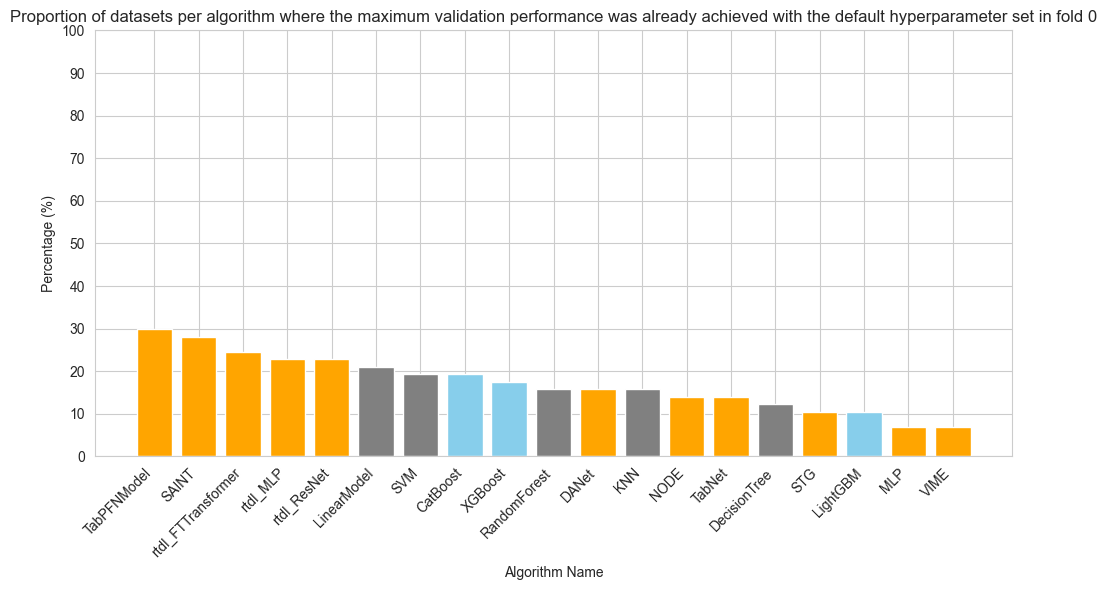

In [50]:
# Define color categories for algorithms
blue_algorithms = {"CatBoost", "LightGBM", "XGBoost"}
gray_algorithms = {"SVM", "DecisionTree", "LinearModel", "KNN", "RandomForest"}

# Assign colors for each algorithm
colors = []
for alg in alg_counts.index:
    if alg in blue_algorithms:
        colors.append('skyblue')  # Blue for GBDT algorithms
    elif alg in gray_algorithms:
        colors.append('gray')  # Gray for baselines algorithms
    else:
        colors.append('orange')  # Orange DL algorithms

# Calculate the frequencies as percentages relative to 57
alg_counts_percent = (alg_counts / 57) * 100

# Create the bar plot with assigned colors
plt.figure(figsize=(10, 6))
plt.bar(alg_counts_percent.index, alg_counts_percent, color=colors)
plt.title('Proportion of datasets per algorithm where the maximum validation performance was already achieved with the default hyperparameter set in fold 0')
plt.xlabel('Algorithm Name')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Set the Y-axis in steps of 10 up to 100%
plt.yticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()
